In [39]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
# Importing the dataset
col_names = ['timeStamp','Gender','Grade','Age','Length','Weight','ShoesSize']
dataset = pd.read_csv('human_features.csv')
dataset.set_axis(col_names, axis=1, inplace=True)
dataset

,timeStamp,Gender,Grade,Age,Length,Weight,ShoesSize
0,2022/03/30 1:47:30 ص غرينتش+2,ذكر,الأعدادية,23,178,74,43
1,2022/03/30 1:55:51 ص غرينتش+2,أنثى,الثالثة,21,155,64,39
2,2022/03/30 1:55:58 ص غرينتش+2,ذكر,الثالثة,21,165,65,41
3,2022/03/30 1:56:00 ص غرينتش+2,ذكر,الثالثة,22,173,80,44
4,2022/03/30 1:59:30 ص غرينتش+2,ذكر,مش في الكلية اصلا,23,170,82,44
...,...,...,...,...,...,...,...
110,2022/03/31 3:58:49 م غرينتش+2,ذكر,مش في الكلية اصلا,22,165,75,40
111,2022/03/31 4:50:20 م غرينتش+2,أنثى,ألاولي,19,159,50,37
112,2022/03/31 4:52:13 م غرينتش+2,أنثى,ألاولي,19,159,50,37
113,2022/03/31 5:29:30 م غرينتش+2,ذكر,الرابعة,22,176,75,43


In [70]:
# Encode Gender
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset

,timeStamp,Gender,Grade,Age,Length,Weight,ShoesSize
0,2022/03/30 1:47:30 ص غرينتش+2,1,الأعدادية,23,178,74,43
1,2022/03/30 1:55:51 ص غرينتش+2,0,الثالثة,21,155,64,39
2,2022/03/30 1:55:58 ص غرينتش+2,1,الثالثة,21,165,65,41
3,2022/03/30 1:56:00 ص غرينتش+2,1,الثالثة,22,173,80,44
4,2022/03/30 1:59:30 ص غرينتش+2,1,مش في الكلية اصلا,23,170,82,44
...,...,...,...,...,...,...,...
110,2022/03/31 3:58:49 م غرينتش+2,1,مش في الكلية اصلا,22,165,75,40
111,2022/03/31 4:50:20 م غرينتش+2,0,ألاولي,19,159,50,37
112,2022/03/31 4:52:13 م غرينتش+2,0,ألاولي,19,159,50,37
113,2022/03/31 5:29:30 م غرينتش+2,1,الرابعة,22,176,75,43


In [71]:
# independent variables (Age, Length, Weight, ShoesSize)>>>features
X = dataset.iloc[:, 3:].values
# dependent variable (Gender) >>>output
y = dataset.iloc[:, 1].values


In [72]:
# Feature Selection with Univariate Statistical Tests

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# feature extraction
test = SelectKBest(score_func=f_classif, k=2)
fit = test.fit(X, y)
X = fit.transform(X)
X

array([[178,  43],
       [155,  39],
       [165,  41],
       [173,  44],
       [170,  44],
       [181,  45],
       [170,  38],
       [190,  48],
       [186,  45],
       [181,  42],
       [183,  44],
       [176,  45],
       [170,  40],
       [176,  42],
       [170,  42],
       [188,  45],
       [156,  39],
       [180,  44],
       [158,  42],
       [170,  44],
       [173,  42],
       [174,  43],
       [159,  42],
       [162,  40],
       [170,  42],
       [178,  45],
       [176,  45],
       [172,  41],
       [185,  43],
       [168,  43],
       [176,  41],
       [170,  43],
       [185,  42],
       [173,  42],
       [183,  46],
       [182,  45],
       [158,  37],
       [165,  40],
       [168,  43],
       [170,  40],
       [183,  45],
       [160,  40],
       [177,  45],
       [172,  42],
       [172,  43],
       [180,  44],
       [174,  42],
       [183,  43],
       [174,  44],
       [163,  40],
       [176,  45],
       [160,  37],
       [168,

In [73]:
# updating independent variables(Length, ShoesSize)
X = dataset.iloc[:,[4,6]]
X

,Length,ShoesSize
0,178,43
1,155,39
2,165,41
3,173,44
4,170,44
...,...,...
110,165,40
111,159,37
112,159,37
113,176,43


In [75]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1])

In [79]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[ 0.94525073,  0.61843075],
       [-0.82274047, -0.23714262],
       [-0.04924432,  1.04621744],
       [-1.59623662, -2.37607605],
       [ 1.71874688,  2.3295775 ],
       [-2.14873387, -2.37607605],
       [ 0.72425183,  1.04621744],
       [ 0.72425183,  1.04621744],
       [ 1.93974578,  0.19064407],
       [ 0.39275348,  0.19064407],
       [ 0.17175458, -0.66492931],
       [-1.04373937, -0.66492931],
       [ 0.17175458, -0.23714262],
       [-1.70673607, -0.23714262],
       [-0.27024322, -0.23714262],
       [-0.15974377,  0.19064407],
       [-0.49124212, -0.23714262],
       [-1.59623662, -1.52050268],
       [-0.04924432, -0.23714262],
       [ 0.28225403,  0.19064407],
       [-2.03823442, -1.52050268],
       [ 0.17175458, -0.23714262],
       [ 0.17175458,  1.04621744]])

In [80]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier    # here we use Euclidean distance >> metric='minkowski',P=2  
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [81]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1])

In [82]:
# accuray
from sklearn.metrics import accuracy_score
round((accuracy_score(y_test, y_pred) * 100), ndigits=2)

95.65

In [83]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 4,  0],
       [ 1, 18]], dtype=int64)

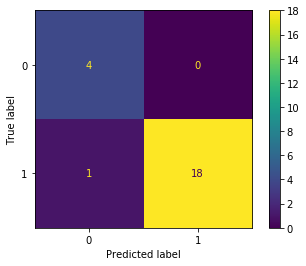

In [84]:
# plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test) 